# EDA II

* Continue on graphical presentation and some of functions that assist in plotting graph
  * Help visualise insights that can be observed from the data
  * By answering questions from datasets

Datasets
1. Forbes 2022 data
2. Annual Sales 2018 data

Graphs
- Histogram
- Distribution plot
- Barplot
- Lineplot

## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Step process
1. Load data
2. Inspect data
3. Clean data (if needed)
4. Explore + visualise data
5. Derive insights from data exploration/visualisation

## Example 1: Forbes 2022 Data

In [ ]:
# 1. Load data
forbes = pd.read_csv('/content/drive/My Drive/DAC/forbes_2022.csv')

# 2. Inspect data
forbes.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
# 3. Clean data

# Check for duplicates with .duplicated() function
forbes.duplicated().sum()

0

In [ ]:
# Check null values with isnull() and sum()
forbes.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [ ]:
# Check data type, see if the type makes sense
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [ ]:
# See that networth is object type, change to numeric

# Replace the $ and B with '' empty string
forbes['networth']= forbes['networth'].str.replace('$','')
forbes['networth']= forbes['networth'].str.replace(' B','')

# Change type to numeric
forbes['networth']=forbes['networth'].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
# Double check
forbes.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


### Q1. Which industry has the highest number of billionaires?

In [ ]:
# Count the total number of billionaires in each industry using value_counts()
forbes['industry'].value_counts()

Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: industry, dtype: int64

In [ ]:
# To display the higest number of billionaires
forbes['industry'].value_counts()[:1]

Finance & Investments     386
Name: industry, dtype: int64

In [ ]:
# To display the top 5 industries
forbes['industry'].value_counts()[:5]


Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Name: industry, dtype: int64

#### Data Visualisation - barplot

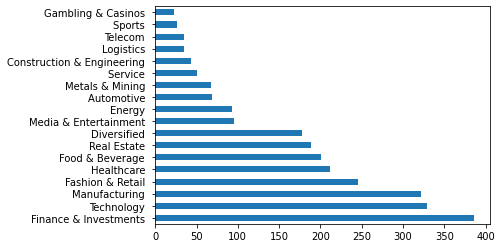

In [ ]:
forbes['industry'].value_counts().plot(kind='barh')

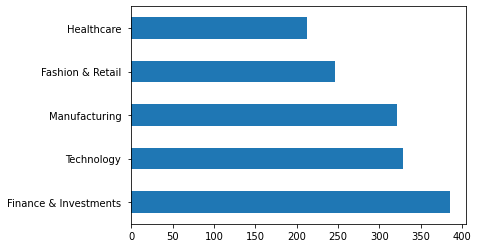

In [ ]:
forbes['industry'].value_counts()[:5].plot(kind='barh')

Finance & Investments industry has the highest number of billionaires

### Q2A. Find the country that has the highest number of billionaires

In [ ]:
# Using value_counts() function
forbes['country'].value_counts()

United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: country, Length: 75, dtype: int64

In [ ]:
# Display the top country
forbes['country'].value_counts()[:1]

United States    719
Name: country, dtype: int64

### Q2B. Plot a graph showing the top 5 countries that have the most number of billionaires

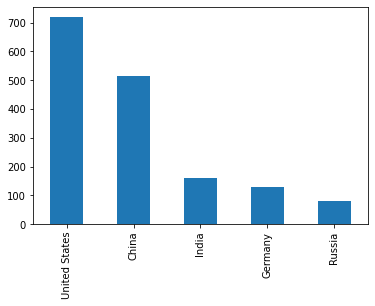

In [ ]:
forbes['country'].value_counts()[:5].plot(kind='bar')

The country with the most billionaires is the US, followed by China, India, Germany and Russia.

### Q3. List the billionaires with networth of more than 60 billion dollars

In [ ]:
# Using operators
forbes[forbes['networth']>=60]

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,111.0,49,United States,Google,Technology
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,7,8,Larry Ellison,106.0,77,United States,software,Technology
8,8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


### Data Visualisation - Histograms

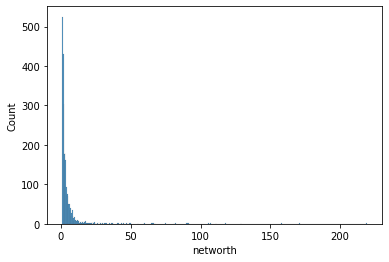

In [ ]:
sns.histplot(forbes['networth'])

### Q4. Find the 5 youngest billionaires

In [ ]:
# Sort the billionaires by age with sort_values()
forbes.sort_values(by=['age'])

,Unnamed: 0,rank,name,networth,age,country,source,industry
1311,1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments
...,...,...,...,...,...,...,...,...
1939,1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance & Investments
1377,1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food & Beverage
162,162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


In [ ]:
# Display the 5 youngest
forbes.sort_values(by=['age'])[:5]

,Unnamed: 0,rank,name,networth,age,country,source,industry
1311,1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments


In [ ]:
# Top 5 youngest billionaires that has a networth of more than 50 billion

forbes_more_50 = forbes[forbes['networth']>=50]
forbes_more_50

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,111.0,49,United States,Google,Technology
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,7,8,Larry Ellison,106.0,77,United States,software,Technology
8,8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


In [ ]:
# Sort and display the 5 youngest that have networth of more than 50 B
forbes_more_50.sort_values(by=['age'])[:5]

,Unnamed: 0,rank,name,networth,age,country,source,industry
14,14,15,Mark Zuckerberg,67.3,37,United States,Facebook,Technology
24,24,25,Zhang Yiming,50.0,38,China,TikTok,Media & Entertainment
19,19,19,Changpeng Zhao,65.0,44,Canada,cryptocurrency exchange,Finance & Investments
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
5,5,6,Larry Page,111.0,49,United States,Google,Technology


### Data Visualisation - Distribution plot
- shows how a variable in your data is distributed

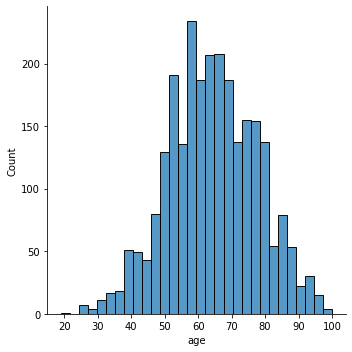

In [ ]:
# Distribution plot of the age variable
sns.displot(x='age',data=forbes)

Majority of billionaires are between 50 - 70 years old. 

Observations from dataset:
1. Most saturated industry / best industry (Finance & Investments)
2. Country with the most opportunity (US) - may be too saturated
3. Who to learn from (Those that really made it)
4. Probable age for someone to get really rich (50 -70 years old)

## Example 2: Annual Sales 2018 data

In [ ]:
# 1. Load data
data = pd.read_csv('/content/drive/My Drive/DAC/2018_annual.csv')

# 2. Inspect data
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [ ]:
# 3. Clean data

# Drop the unnecessary column (Unnamed:0)
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [ ]:
# Check data type, see if it makes sense
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [ ]:
# Convert 'Order Date' column into datetime type

data['Order Date'] = data['Order Date'].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [ ]:
# Double check
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [ ]:
# Extract year from Order date into a new column
data['Year'] = data['Order Date'].dt.year
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018


### Q1. Which month had the best sales?

In [ ]:
# 1. Extract month from Order Data into new column
data['Month'] = data['Order Date'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 11.3+ MB


In [ ]:
# 2. Insert a sales column
data['Sales'] = data['Price Each'] * data['Quantity Ordered']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018,9,15.36
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018,9,23.90
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018,9,11.95
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018,9,149.99
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018,9,11.95


In [ ]:
# 3. Group data by month with groupby() function
groupby_month = data.groupby('Month')

gross_sales_by_ascending = groupby_month.sum().sort_values('Sales')['Sales']
gross_sales_by_ascending

Month
1     1816846.41
9     2091892.33
2     2195978.76
8     2239309.25
6     2570410.65
7     2641281.10
3     2800592.49
5     3144348.98
11    3190667.83
4     3378020.92
10    3727769.15
12    4603683.90
Name: Sales, dtype: float64

In [ ]:
gross_sales_by_month = groupby_month.sum().sort_values("Month")['Sales']
gross_sales_by_month

Month
1     1816846.41
2     2195978.76
3     2800592.49
4     3378020.92
5     3144348.98
6     2570410.65
7     2641281.10
8     2239309.25
9     2091892.33
10    3727769.15
11    3190667.83
12    4603683.90
Name: Sales, dtype: float64

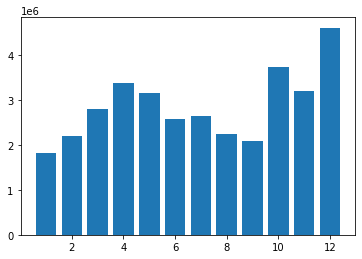

In [ ]:
# 4. Visualisation with barplot
fig, ax = plt.subplots()
ax.bar(gross_sales_by_month.index, gross_sales_by_month)
plt.show()


The month of December had the best sales in 2018.

### Q2. Which city made the best sales?

In [ ]:
# Where to find city???
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018,9,15.36
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018,9,23.90
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018,9,11.95
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018,9,149.99
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018,9,11.95


In [ ]:
# 1. Define a function to get city from address
def city_from_address(address):
  # address pattern is street,city,postal code
  substrs = address.split(',')
  city = substrs[1].strip()

  return city

data['City'] = data['Purchase Address'].apply(city_from_address)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018,9,15.36,Boston
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018,9,23.90,New York City
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018,9,11.95,Portland
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018,9,149.99,Atlanta
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018,9,11.95,San Francisco


In [ ]:
# 2. Group data by cities
groupby_city = data.groupby('City')
gross_sales_by_city = groupby_city.sum()['Sales']

print(gross_sales_by_city)

City
Atlanta          2725675.42
Austin           1895729.79
Boston           3704885.70
Dallas           2739846.70
Los Angeles      5484179.49
New York City    4560903.07
Portland         2304056.11
San Francisco    8235163.62
Seattle          2750361.87
Name: Sales, dtype: float64


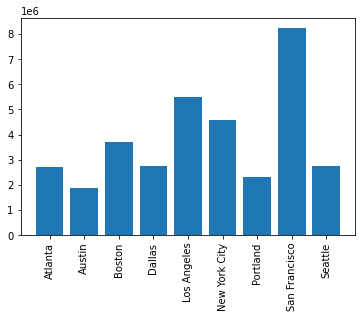

In [ ]:
# 3. Plot bar plots
fig, ax = plt.subplots()
ax.bar(gross_sales_by_city.index, gross_sales_by_city)

plt.xticks(rotation=90)
plt.show()

San Francisco made the best sales in 2018.

### Q3. Which city makes the best sales across all 12 months?

In [ ]:
# 1. Groupby by multiple columns
groupby_data = data.groupby(['Month','City']).sum()['Sales']
groupby_data

Month  City         
1      Atlanta           140897.76
       Austin            108931.35
       Boston            195159.63
       Dallas            149855.22
       Los Angeles       283262.80
                           ...    
12     Los Angeles       738315.55
       New York City     601734.15
       Portland          327456.56
       San Francisco    1102080.28
       Seattle           388580.13
Name: Sales, Length: 108, dtype: float64

#### .loc() function
Example: Query the sales of each city in the first 3 months

In [ ]:
# Information of gross sales in every city for the 1st 3 months will be displayed
groupby_data.loc[1:3, :]

Month  City         
1      Atlanta          140897.76
       Austin           108931.35
       Boston           195159.63
       Dallas           149855.22
       Los Angeles      283262.80
       New York City    253099.75
       Portland         119171.46
       San Francisco    428303.33
       Seattle          138165.11
2      Atlanta          179923.72
       Austin           129885.50
       Boston           248039.51
       Dallas           175834.93
       Los Angeles      342658.07
       New York City    293728.78
       Portland         148917.02
       San Francisco    514205.24
       Seattle          162785.99
3      Atlanta          241112.23
       Austin           166382.80
       Boston           305137.75
       Dallas           230516.67
       Los Angeles      424076.35
       New York City    359836.21
       Portland         186860.28
       San Francisco    665278.48
       Seattle          221391.72
Name: Sales, dtype: float64

In [ ]:
# Can query individual cities (Example: Atlanta)
groupby_data.loc[1:3, 'Atlanta']

Month  City   
1      Atlanta    140897.76
2      Atlanta    179923.72
3      Atlanta    241112.23
Name: Sales, dtype: float64

In [ ]:
# Query sales of a city in 12 months
groupby_data.loc[:, 'Boston']

Month
1     195159.63
2     248039.51
3     305137.75
4     364424.77
5     332174.18
6     273778.10
7     302737.87
8     241385.57
9     235892.75
10    359696.63
11    358565.46
12    487893.48
Name: Sales, dtype: float64

In [ ]:
# 2. Get a list of cities
cities = data['City'].unique()
cities

array(['Boston', 'New York City', 'Portland', 'Atlanta', 'San Francisco',
       'Dallas', 'Austin', 'Los Angeles', 'Seattle'], dtype=object)

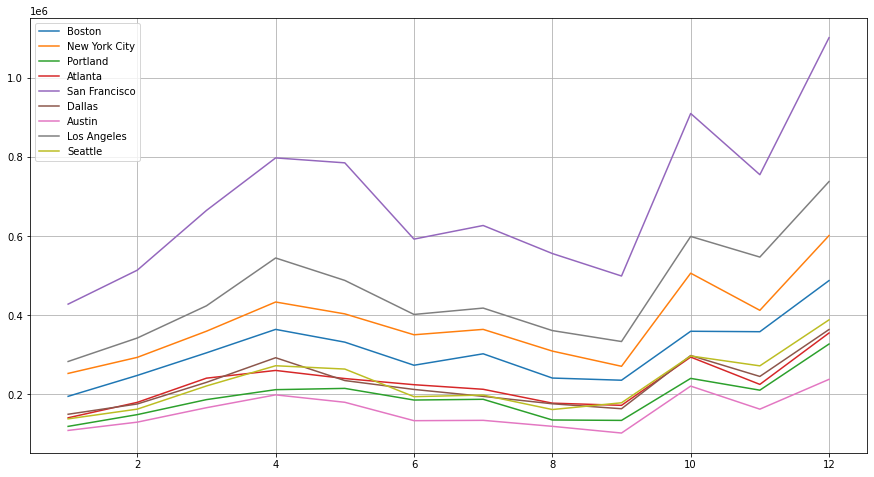

In [ ]:
# 3. Visualisation
fig, ax = plt.subplots(figsize=(15,8))

# 3.1 Loop thru all the cities
for city in cities:
    # 3.2 Get the city's 12 months of sales
    current_sales = groupby_data.loc[:, city]

    # 3.3 PLot line plot for this city
    ax.plot(current_sales, label=city)

plt.grid()
plt.legend()
plt.show()

San Francisco

Take Home Assignment

### Q4. Which products were sold the most?


### Q5. Which time are buyers most active?